## Presentado por Alejandro Pérez Lugo

# **1. Contexto del Análisis**

Créditos Parra y Compañía es una empresa en Colombia, con sede principal en Leticia. Opera en comercio de artículos electrónicos, electrodomésticos, gasodomesticos muebles y equipos de iluminacion en establecimientos especializados. Actualmente, la empresa está iniciando una transición hacia la analítica de datos para mejorar el control y la eficiencia en sus procesos.

# **2. Pregunta SMART:**

Uno de los principales problemas identificados es el alto porcentaje de cartera vencida, que promedia el 46%. Este problema puede ser abordado mediante técnicas de ciencia de datos e inteligencia artificial (IA), 
que permitirán organizar la información, descubrir patrones, visualizar datos y predecir riesgos y oportunidades, facilitando la toma de decisiones y la automatización de procesos

*¿Cuáles son los clientes que tienen una alta probabilidad de continuar o iniciar con cartera vencida en los meses restantes del 2024?*


# **3. Diccionario de datos:**

| Variable    | Descripción                                                 | 
|-------------|-------------------------------------------------------------|     
| Código      | NIT o identificar del cliente                               | 
| Documento   | Identificador de la factura                                 | 
| fec_ela     | Fecha de elaboración de la factura                          | 
| fec_vcto    | Fecha de vencimiento de la factura                          | 
| dias_vcto   | Días de vencimiento de la factura                           | 
| sin_vencer  | Valor monetario que no se ha vencido de la factura          | 
| _01_30      | Edad de la cartera que presenta vencimiento entre 01_30 días|
| _61_90      | Edad de la cartera que presenta vencimiento entre 61_90 días|
| mas_de_90   | Edad de la cartera que presenta vencimiento >90 días        |
| total       | Total valor de la deuda                                     |





In [1]:
# Importar librerías

import pandas as pd
import numpy as np
import os
from datetime import *

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Mostrar todos los datos del dataframe
pd.options.display.max_columns = None

### Carga de archivos

In [2]:
# Ruta de la carpeta que contiene los archivos
folder_path = 'C:/Users/Aleja/OneDrive/Escritorio/Cartera/Proyecto - Análisis exploratorio/'

# Listar todos los archivos .xlsx en la carpeta
file_list = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

# Ordenar los archivos por fecha de modificación (más recientes primero)
file_list = sorted(file_list, key=lambda f: os.path.getmtime(os.path.join(folder_path, f)), reverse=True)

# Seleccionar los últimos 6 archivos más recientes
last_6_files = file_list[:1]

# Crear una lista para almacenar los DataFrames
dfs = []

# Función para extraer el mes, año y la fecha completa del nombre del archivo
def extract_date_from_filename(filename):
    base_name = os.path.splitext(filename)[0]
    date_str = base_name.split()[-1]  # Extraer "DDMMYYYY"
    if len(date_str) == 8:  # Verificar que la longitud sea correcta
        try:
            date_obj = datetime.strptime(date_str, '%d%m%Y')
            month_year = date_obj.strftime('%b %Y').lower()
            full_date = date_obj.strftime('%Y-%m-%d')
            return month_year, full_date, date_obj
        except ValueError:
            return None, None, None
    return None, None, None

# Leer cada uno de los últimos 12 archivos más recientes
for file_name in last_6_files:
    file_path = os.path.join(folder_path, file_name)
    month_year, full_date, date_obj = extract_date_from_filename(file_name)
    
    # Leer el archivo Excel y agregar las columnas de mes y fecha completa
    if month_year and full_date:
        df = pd.read_excel(file_path)
        df['mes_año'] = month_year
        df['fecha_completa'] = full_date
        dfs.append(df)

# Concatenar todos los DataFrames en uno solo
df = pd.concat(dfs, ignore_index=True)

print('Dimensión base inicial', df.shape)

Dimensión base inicial (1766, 16)


### Visualizar el dataframe

In [3]:
# Mostrar las primeras filas del DataFrame combinado
print(df.head(5))

         codigo                            nombre   cu     documento  \
0  9.006926e+08  AAA MAQUINARIAS & MATERIALES SAS  1.0  FC-003657-01   
1           NaN                               NaN  NaN           NaN   
2  1.018436e+09        ACOSTA URREGO ERIKA YOHANA  1.0  FE-022043-04   
3  1.018436e+09        ACOSTA URREGO ERIKA YOHANA  1.0  FE-022043-05   
4  1.018436e+09        ACOSTA URREGO ERIKA YOHANA  1.0  FE-022043-06   

       fec_ela     fec_vcto  dias_vcto  sin_vencer  _01_30  _31_60  _61_90  \
0  2022-DIC-31  2020-FEB-28       1584           0       0       0       0   
1          NaN          NaN          0           0       0       0       0   
2  2024-MAR-13  2024-JUL-15        -15      154000       0       0       0   
3  2024-MAR-13  2024-AGO-15        -46      154000       0       0       0   
4  2024-MAR-13  2024-SEP-15        -77      154000       0       0       0   

   mas_de_90  vend_tmp    total   mes_año fecha_completa  
0    2128950       NaN  2128950  jun 20

In [4]:
# Mostrar las últimas filas filas del DataFrame combinado
print(df.tail(5))

      codigo                               nombre  cu documento fec_ela  \
1761     NaN                                  NaN NaN       NaN     NaN   
1762     NaN  Empresa:CREDITOS PARRA Y CIA S.A.S. NaN       NaN     NaN   
1763     NaN  Cuenta:130515   Cartera de clientes NaN       NaN     NaN   
1764     NaN                              General NaN       NaN     NaN   
1765     NaN               2024.08.06 04:11:35 PM NaN       NaN     NaN   

     fec_vcto  dias_vcto  sin_vencer  _01_30  _31_60  _61_90  mas_de_90  \
1761      NaN          0           0       0       0       0          0   
1762      NaN          0           0       0       0       0          0   
1763      NaN          0           0       0       0       0          0   
1764      NaN          0           0       0       0       0          0   
1765      NaN          0           0       0       0       0          0   

      vend_tmp  total   mes_año fecha_completa  
1761       NaN      0  jun 2024     2024-06-30  


# **4.Preparación de los datos:**

Se arreglan unos tipos de datos, dado que más adelante necesitaremos sólo las variables númericas para el gráfico de correlación.

In [5]:
# Corregir los tipos de datos
df['codigo'] = df['codigo'].astype(str)
df['nombre'] = df['nombre'].astype(str)
df['documento'] = df['documento'].astype(str)

df['conteo'] = 1

In [6]:
# Visualizar estructura del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766 entries, 0 to 1765
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   codigo          1766 non-null   object 
 1   nombre          1766 non-null   object 
 2   cu              1431 non-null   float64
 3   documento       1766 non-null   object 
 4   fec_ela         1431 non-null   object 
 5   fec_vcto        1431 non-null   object 
 6   dias_vcto       1766 non-null   int64  
 7   sin_vencer      1766 non-null   int64  
 8   _01_30          1766 non-null   int64  
 9   _31_60          1766 non-null   int64  
 10  _61_90          1766 non-null   int64  
 11  mas_de_90       1766 non-null   int64  
 12  vend_tmp        1084 non-null   float64
 13  total           1766 non-null   int64  
 14  mes_año         1766 non-null   object 
 15  fecha_completa  1766 non-null   object 
 16  conteo          1766 non-null   int64  
dtypes: float64(2), int64(8), object(7

In [7]:
# Eliminar columnas innecesarias
df = df.drop(columns=['nombre', 'cu', 'vend_tmp'], index=1)

In [8]:
# Ver na por columna
df.isna().sum()

codigo              0
documento           0
fec_ela           334
fec_vcto          334
dias_vcto           0
sin_vencer          0
_01_30              0
_31_60              0
_61_90              0
mas_de_90           0
total               0
mes_año             0
fecha_completa      0
conteo              0
dtype: int64

In [9]:
# Eliminar n/a
df = df.dropna()
print('Dimensión base inicial', df.shape)

Dimensión base inicial (1431, 14)


In [10]:
df['total'].describe()

count    1.431000e+03
mean     5.986996e+05
std      5.015572e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.559082e+08
Name: total, dtype: float64

In [11]:
df = df.loc[df['total'] > 0]
print('Dimensión base inicial', df.shape)

Dimensión base inicial (327, 14)


De igual forma, el formato que viene del ERP no permite trabajar con los valores de fecha, por lo tanto, se hace un arreglo para poder trabajar con las columnas de fecha, además se crea una variable sintetica para revisar valores en donde la fecha de elaboración sea mayor que la fecha de vencimiento, técnicamente esto no debería ser posible, pero por temas de gobernanza de datos no existente, ocurren estos casos.

In [12]:
# Primero, crea un diccionario de los meses en español

meses_esp = {'ENE': '01', 'FEB': '02', 'MAR': '03', 'ABR': '04', 'MAY': '05', 
             'JUN': '06', 'JUL': '07', 'AGO': '08', 'SEP': '09', 'OCT': '10', 
             'NOV': '11', 'DIC': '12'}

# Función para reemplazar el mes en la cadena de fecha
def convertir_fecha(fecha):
    for mes, num in meses_esp.items():
        if mes in fecha.upper():
            fecha = fecha.upper().replace(mes, num)
    return fecha

# Aplicar la función a las columnas de fecha antes de convertirlas a datetime
df['fec_ela'] = df['fec_ela'].apply(convertir_fecha)
df['fec_vcto'] = df['fec_vcto'].apply(convertir_fecha)

# Ahora convierte a datetime usando el formato 'YYYY-MM-DD'
df['fec_ela'] = pd.to_datetime(df['fec_ela'], format='%Y-%m-%d')
df['fec_vcto'] = pd.to_datetime(df['fec_vcto'], format='%Y-%m-%d')
df['fecha_completa'] = pd.to_datetime(df['fecha_completa'], format='%Y-%m-%d')

# Crear la variable 'val_fec' comparando 'fec_ela' y 'fec_vcto'
df['val_fec'] = np.where(df['fec_ela'] > df['fec_vcto'], 1, 0)

# Validar fechas
df['val_fec'].value_counts()

val_fec
0    232
1     95
Name: count, dtype: int64

Imputaremos las fechas de elaboración con la media del promedio de días entre las fecha de elaboración y la fecha de vencimiento, acá no tenemos en cuenta los valores mayores en fecha de elaboración, puesto que afectarían directamente el cálculo, depués de conseguir el valor, lo imputamos en la fecha de elaboración, tomando la fecha de venccimiento y restandole los 184 días promedio, esto tiene mucho sentido, ya que nos dice que los prestamos en general se sacan apróximadamente por 6 meses.

In [13]:
# Calcular la diferencia en días entre 'fec_vcto' y 'fec_ela'
dif_days = np.where((df['fec_vcto'] - df['fec_ela']).dt.days>0,(df['fec_vcto'] - df['fec_ela']).dt.days,0)

# Calcular la media de la diferencia en días
df_mean = np.mean(dif_days)

print(df_mean)

114.09785932721712


In [14]:
# Imputar los valores tipo 1 en 'fec_ela' restando 30 días de 'fec_vcto' donde 'val_fec' es 1
df['fec_ela'] = np.where(df['val_fec'] == 1, df['fec_vcto'] - pd.Timedelta(days=117), df['fec_ela'])

# Crear la variable 'val_fec' comparando 'fec_ela' y 'fec_vcto'
df['val_fec'] = np.where(df['fec_ela'] > df['fec_vcto'], 1, 0)

# Validar fechas
df['val_fec'].value_counts()

val_fec
0    327
Name: count, dtype: int64

Al encontrar esta diferencia en la fecha de elaboración se procederá a revisar los días de vencimiento, es claro que si las fechas de elaboración se encontraban mal parametrizadas, estos días de vencimiento también tendrán algún error, por lo tanto, revisamos su comportamiento, en teoría no deben existir valores negativos

In [15]:
# Arreglar días de vcto
df['dias_vcto'] = np.where(df['sin_vencer'] == 0, (df['fecha_completa'] - df['fec_ela']).dt.days , 0)

In [16]:
#No deben existir negativos ni valores totales menores a cualquier edad, se procede a eliminar estos registros
df = df[(df['_01_30'] >= 0) & (df['_31_60'] >= 0) & (df['_61_90'] >= 0) & (df['mas_de_90'] >= 0) & (df['total'] >= df['sin_vencer']) & (df['sin_vencer'] >= 0)]

df

,codigo,documento,fec_ela,fec_vcto,dias_vcto,sin_vencer,_01_30,_31_60,_61_90,mas_de_90,total,mes_año,fecha_completa,conteo,val_fec
0,900692604.0,FC-003657-01,2019-11-03,2020-02-28,1701,0,0,0,0,2128950,2128950,jun 2024,2024-06-30,1,0
4,1018436123.0,FE-022043-06,2024-03-13,2024-09-15,0,154000,0,0,0,0,462000,jun 2024,2024-06-30,1,0
9,1121214029.0,FE-020137-10,2023-12-07,2024-10-06,0,548000,0,0,0,0,2192000,jun 2024,2024-06-30,1,0
14,22931074.0,FE-022391-06,2024-04-03,2024-10-03,0,305000,0,0,0,0,1220000,jun 2024,2024-06-30,1,0
17,40150589.0,CR-018472-06,2018-01-05,2018-05-02,2368,0,0,0,0,169000,280000,jun 2024,2024-06-30,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,40176591.0,FE-024872-05,2024-06-29,2024-11-30,0,130000,0,0,0,0,650000,jun 2024,2024-06-30,1,0
1740,6566466.0,FC-003647-06,2020-04-03,2020-07-29,1549,0,0,0,0,403000,1496000,jun 2024,2024-06-30,1,0
1743,830010181.0,FE-024232-01,2024-06-18,2024-07-18,0,39909,0,0,0,0,86197,jun 2024,2024-06-30,1,0
1749,60315820.0,FE-022748-06,2024-04-23,2024-10-30,0,214000,0,0,0,0,1070000,jun 2024,2024-06-30,1,0


In [17]:
df_saldo_pend = df.groupby('codigo').agg({'dias_vcto': 'max', 'conteo': 'count', 'total':['mean', 'sum']}).reset_index()

# Aplanar el MultiIndex en las columnas
df_saldo_pend.columns = ['codigo', 'dias_vcto_max', 'conteo_documento', 'total_mean', 'total_sum']

In [18]:
df_saldo_pend.head(10)

,codigo,dias_vcto_max,conteo_documento,total_mean,total_sum
0,1000950570.0,1714,1,1582831.0,1582831
1,1006732888.0,0,1,1416000.0,1416000
2,1006784464.0,0,1,810000.0,810000
3,1006814894.0,0,1,645000.0,645000
4,1007366346.0,1896,1,925000.0,925000
5,1007769172.0,0,1,1095000.0,1095000
6,1013658062.0,0,1,924000.0,924000
7,1014215189.0,0,1,1148600.0,1148600
8,1014259366.0,0,1,1334000.0,1334000
9,1015412537.0,0,1,2665000.0,2665000


## Funcion para crear variables sinteticas

#### Se busca obtener informacion de dias_maxcorte	conteo_documentocorte	total_meancorte	total_sumcorte, para diferentes temporalidades.


In [19]:
def process_saldos_pendientes(num=int):
    print('INICIO PROCESS')
    print('=' * 120)
    time1 = datetime.now()

    # Ruta de la carpeta que contiene los archivos
    ruta_archivos = 'C:/Users/Aleja/OneDrive/Escritorio/Cartera/Proyecto - Análisis exploratorio/'
    # Archivos a utilizar
    dirs = os.listdir(ruta_archivos)  # Listado de archivos en la carpeta
    dirs = dirs[-num:]  # Obtener solo los últimos 'num' archivos
    dirs = [ruta_archivos + x for x in dirs]  # Crear rutas completas de archivos
    print('Archivos a cargar:', dirs)
    
    # Inicializar df_list
    df_list = []
    
    # Función para extraer el mes, año y la fecha completa del nombre del archivo
    def extract_date_from_filename(filename):
        base_name = os.path.splitext(filename)[0]
        date_str = base_name.split()[-1]  # Extraer "DDMMYYYY"
        if len(date_str) == 8:  # Verificar que la longitud sea correcta
            try:
                date_obj = datetime.strptime(date_str, '%d%m%Y')
                month_year = date_obj.strftime('%b %Y').lower()
                full_date = date_obj.strftime('%Y-%m-%d')
                return month_year, full_date, date_obj
            except ValueError:
                return None, None, None
        return None, None, None
    
    # Cargar archivos según el parámetro indicado
    if num == 1:
        file_path = dirs[-1]
        file_name = os.path.basename(file_path)
        month_year, full_date, date_obj = extract_date_from_filename(file_name)
        df = pd.read_excel(file_path, dtype={'codigo': str})
        if month_year and full_date:
            df['mes_año'] = month_year
            df['fecha_completa'] = full_date
        df_list.append(df)
    else:
        for file_path in dirs:
            file_name = os.path.basename(file_path)
            month_year, full_date, date_obj = extract_date_from_filename(file_name)
            # Leer el archivo Excel si se pudo extraer la fecha correctamente
            if month_year and full_date:
                df_temp = pd.read_excel(file_path)
                df_temp['mes_año'] = month_year
                df_temp['fecha_completa'] = full_date
                df_list.append(df_temp)
    
    # Verifica si df_list contiene DataFrames antes de concatenar
    if not df_list:
        raise ValueError("No se encontraron archivos válidos para cargar.")
    
    # Combinar todos los DataFrames
    df = pd.concat(df_list, axis=0, ignore_index=True)
    
    # Limpieza de datos
    df['conteo'] = 1
    print('Dimensión base inicial', df.shape)
    df = df.drop(columns=['nombre', 'cu', 'vend_tmp'], errors='ignore')
    df = df.dropna()
    print('Dimensión base después de limpiar NaNs', df.shape)
    df = df.loc[df['total'] > 0]
    print('Dimensión base después de filtrar "total" > 0', df.shape)
    
    meses_esp = {'ENE': '01', 'FEB': '02', 'MAR': '03', 'ABR': '04', 'MAY': '05',
                    'JUN': '06', 'JUL': '07', 'AGO': '08', 'SEP': '09', 'OCT': '10',
                    'NOV': '11', 'DIC': '12'}
    # Función para reemplazar el mes en la cadena de fecha
    def convertir_fecha(fecha):
        for mes, num in meses_esp.items():
            if mes in fecha.upper():
                fecha = fecha.upper().replace(mes, num)
        return fecha
    
    # Aplicar la función a las columnas de fecha antes de convertirlas a datetime
    df['fec_ela'] = df['fec_ela'].apply(convertir_fecha)
    df['fec_vcto'] = df['fec_vcto'].apply(convertir_fecha)
    
    # Ahora convierte a datetime usando el formato 'YYYY-MM-DD'
    df['fec_ela'] = pd.to_datetime(df['fec_ela'], format='%Y-%m-%d', errors='coerce')
    df['fec_vcto'] = pd.to_datetime(df['fec_vcto'], format='%Y-%m-%d', errors='coerce')
    df['fecha_completa'] = pd.to_datetime(df['fecha_completa'], format='%Y-%m-%d', errors='coerce')
    
    # Crear la variable 'val_fec' comparando 'fec_ela' y 'fec_vcto'
    df['val_fec'] = np.where(df['fec_ela'] > df['fec_vcto'], 1, 0)
    print(df['val_fec'].value_counts())
    
    # Calcular la diferencia en días entre 'fec_vcto' y 'fec_ela'
    dif_days = np.where((df['fec_vcto'] - df['fec_ela']).dt.days > 0, (df['fec_vcto'] - df['fec_ela']).dt.days, 0)
    # Calcular la media de la diferencia en días
    df_mean = np.mean(dif_days)
    print(df_mean)
    
    # Imputar los valores tipo 1 en 'fec_ela' restando 30 días de 'fec_vcto' donde 'val_fec' es 1
    df['fec_ela'] = np.where(df['val_fec'] == 1, df['fec_vcto'] - pd.Timedelta(days=117), df['fec_ela'])
    
    # Recalcular 'val_fec' después de la imputación
    df['val_fec'] = np.where(df['fec_ela'] > df['fec_vcto'], 1, 0)
    print(df['val_fec'].value_counts())
    
    # Arreglar días de vencimiento
    df['dias_vcto'] = np.where(df['sin_vencer'] == 0, (df['fecha_completa'] - df['fec_ela']).dt.days, 0)
    df_saldo_pend = df.groupby('codigo').agg({'dias_vcto': 'max', 'conteo': 'count', 'total': ['mean', 'sum']}).reset_index()
    
    # Renombrar las columnas
    if num == 1:
        nombre = 'corte'
    else:
        nombre = str(num)+'m'
        
    df_saldo_pend.columns = ['codigo', 'dias_max'+nombre, 'conteo_documento'+nombre, 'total_mean'+nombre, 'total_sum'+nombre]

    time2 = datetime.now()
    print('Tiempo de ejecución: ', time2 - time1)
    return df_saldo_pend

#### Gestion para calcular valores de los distintos meses

In [20]:
df1 = process_saldos_pendientes(num=1)
df2 = process_saldos_pendientes(num=3)
df3 = process_saldos_pendientes(num=6)
df4 = process_saldos_pendientes(num=8)

df1['codigo'] = df1['codigo'].astype(str)
df2['codigo'] = df2['codigo'].astype(str)
df3['codigo'] = df3['codigo'].astype(str)
df4['codigo'] = df4['codigo'].astype(str)

dfs = [df2,df3,df4]
for i in dfs:
    df1 = pd.merge(df1, i, how='outer', on='codigo')
print(df1.shape)
df1.head()

INICIO PROCESS
Archivos a cargar: ['C:/Users/Aleja/OneDrive/Escritorio/Cartera/Proyecto - Análisis exploratorio/Proyección de Vencimientos 31122023.xlsx']
Dimensión base inicial (1966, 17)
Dimensión base después de limpiar NaNs (1606, 14)
Dimensión base después de filtrar "total" > 0 (351, 14)
val_fec
0    253
1     98
Name: count, dtype: int64
123.7094017094017
val_fec
0    351
Name: count, dtype: int64
Tiempo de ejecución:  0:00:00.151489
INICIO PROCESS
Archivos a cargar: ['C:/Users/Aleja/OneDrive/Escritorio/Cartera/Proyecto - Análisis exploratorio/Proyección de Vencimientos 31052024.xlsx', 'C:/Users/Aleja/OneDrive/Escritorio/Cartera/Proyecto - Análisis exploratorio/Proyección de Vencimientos 31102023.xlsx', 'C:/Users/Aleja/OneDrive/Escritorio/Cartera/Proyecto - Análisis exploratorio/Proyección de Vencimientos 31122023.xlsx']
Dimensión base inicial (5254, 17)
Dimensión base después de limpiar NaNs (4240, 14)
Dimensión base después de filtrar "total" > 0 (990, 14)
val_fec
0    697
1  

,codigo,dias_maxcorte,conteo_documentocorte,total_meancorte,total_sumcorte,dias_max3m,conteo_documento3m,total_mean3m,total_sum3m,dias_max6m,conteo_documento6m,total_mean6m,total_sum6m,dias_max8m,conteo_documento8m,total_mean8m,total_sum8m
0,00120043775-2,2105.0,1.0,375000.0,375000.0,2257.0,3.0,375000.0,1125000.0,2257.0,5.0,375000.0,1875000.0,2257,7,375000.0,2625000
1,007259,NaN,NaN,NaN,NaN,0.0,1.0,269000.0,269000.0,0.0,2.0,672500.0,1345000.0,0,4,874250.0,3497000
2,01229757236,NaN,NaN,NaN,NaN,130.0,1.0,454000.0,454000.0,130.0,3.0,681000.0,2043000.0,130,5,635600.0,3178000
3,04605527,2122.0,1.0,2340000.0,2340000.0,2274.0,3.0,2340000.0,7020000.0,2274.0,5.0,2340000.0,11700000.0,2274,7,2340000.0,16380000
4,0766393,0.0,1.0,1032000.0,1032000.0,0.0,1.0,1032000.0,1032000.0,65.0,2.0,1032000.0,2064000.0,65,2,1032000.0,2064000


In [21]:
df1 = df1.fillna(0)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   codigo                 867 non-null    object 
 1   dias_maxcorte          867 non-null    float64
 2   conteo_documentocorte  867 non-null    float64
 3   total_meancorte        867 non-null    float64
 4   total_sumcorte         867 non-null    float64
 5   dias_max3m             867 non-null    float64
 6   conteo_documento3m     867 non-null    float64
 7   total_mean3m           867 non-null    float64
 8   total_sum3m            867 non-null    float64
 9   dias_max6m             867 non-null    float64
 10  conteo_documento6m     867 non-null    float64
 11  total_mean6m           867 non-null    float64
 12  total_sum6m            867 non-null    float64
 13  dias_max8m             867 non-null    int64  
 14  conteo_documento8m     867 non-null    int64  
 15  total_

In [22]:
df1.describe()

,dias_maxcorte,conteo_documentocorte,total_meancorte,total_sumcorte,dias_max3m,conteo_documento3m,total_mean3m,total_sum3m,dias_max6m,conteo_documento6m,total_mean6m,total_sum6m,dias_max8m,conteo_documento8m,total_mean8m,total_sum8m
count,867.000000,867.000000,8.670000e+02,8.670000e+02,867.000000,867.000000,8.670000e+02,8.670000e+02,867.000000,867.000000,8.670000e+02,8.670000e+02,867.000000,867.000000,8.670000e+02,8.670000e+02
mean,179.459054,0.404844,1.210022e+06,1.210022e+06,207.224913,1.141869,1.509000e+06,3.176805e+06,413.202999,2.331027,2.566310e+06,6.632879e+06,415.667820,3.121107,2.568883e+06,8.750338e+06
std,513.597641,0.491145,7.490673e+06,7.490673e+06,558.286674,1.150133,6.540488e+06,1.727725e+07,739.906837,1.594591,9.609970e+06,3.434523e+07,738.881739,2.405796,9.754400e+06,4.717812e+07
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,2.095200e+04,2.095200e+04
25%,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,4.276667e+05,7.120000e+05,0.000000,1.000000,4.260000e+05,7.700000e+05
50%,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,3.420000e+05,5.040000e+05,0.000000,1.000000,8.680000e+05,1.580000e+06,0.000000,2.000000,8.605714e+05,1.902000e+06
75%,0.000000,1.000000,6.585000e+05,6.585000e+05,0.000000,2.000000,1.054375e+06,1.840000e+06,419.500000,4.000000,1.582831e+06,4.058002e+06,419.500000,6.000000,1.572333e+06,5.352000e+06
max,2283.000000,1.000000,1.397286e+08,1.397286e+08,2435.000000,3.000000,1.050754e+08,3.152262e+08,2465.000000,5.000000,1.559082e+08,6.270425e+08,2465.000000,7.000000,1.559082e+08,9.388588e+08


#### Visualizar los datos obtenidos

#### Para hacer el analisis multivariado

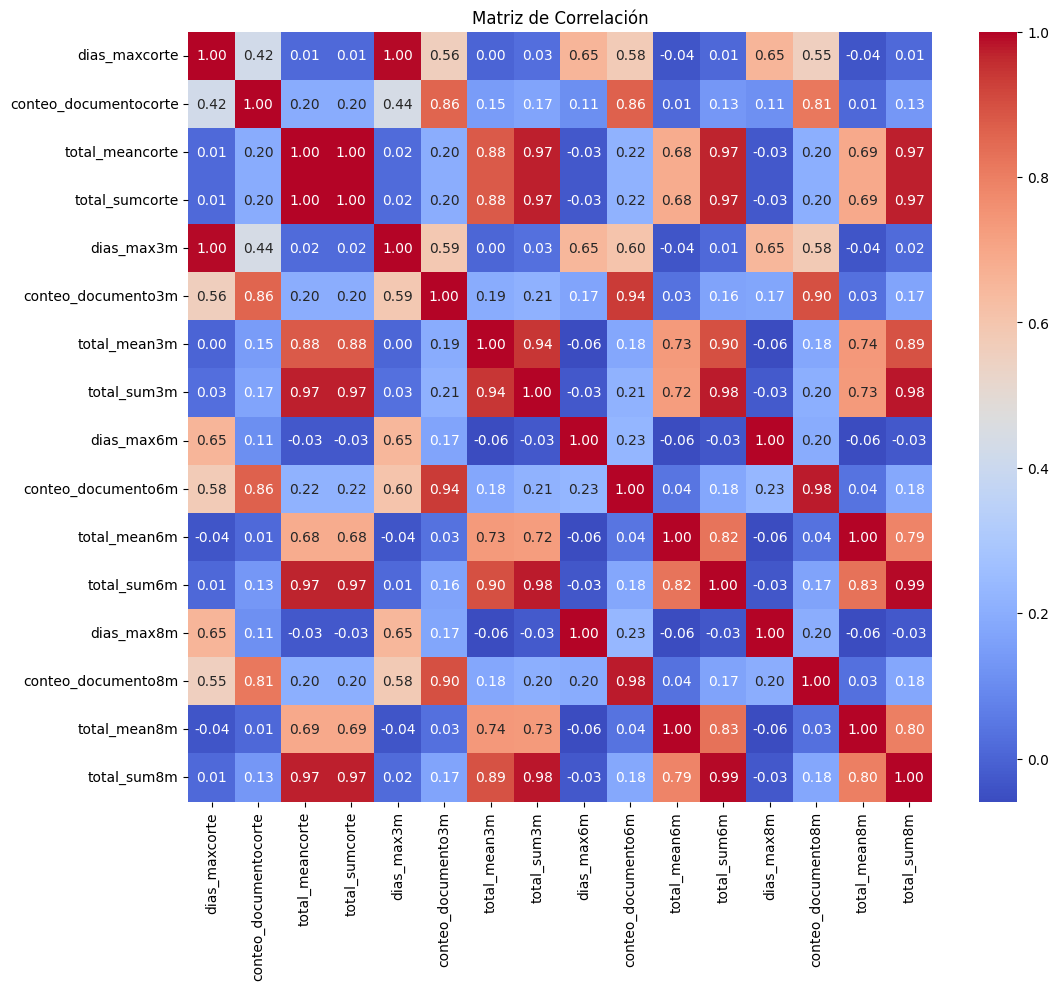

In [23]:
# Seleccionar solo las columnas numéricas
numeric_df = df1.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Mostrar el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

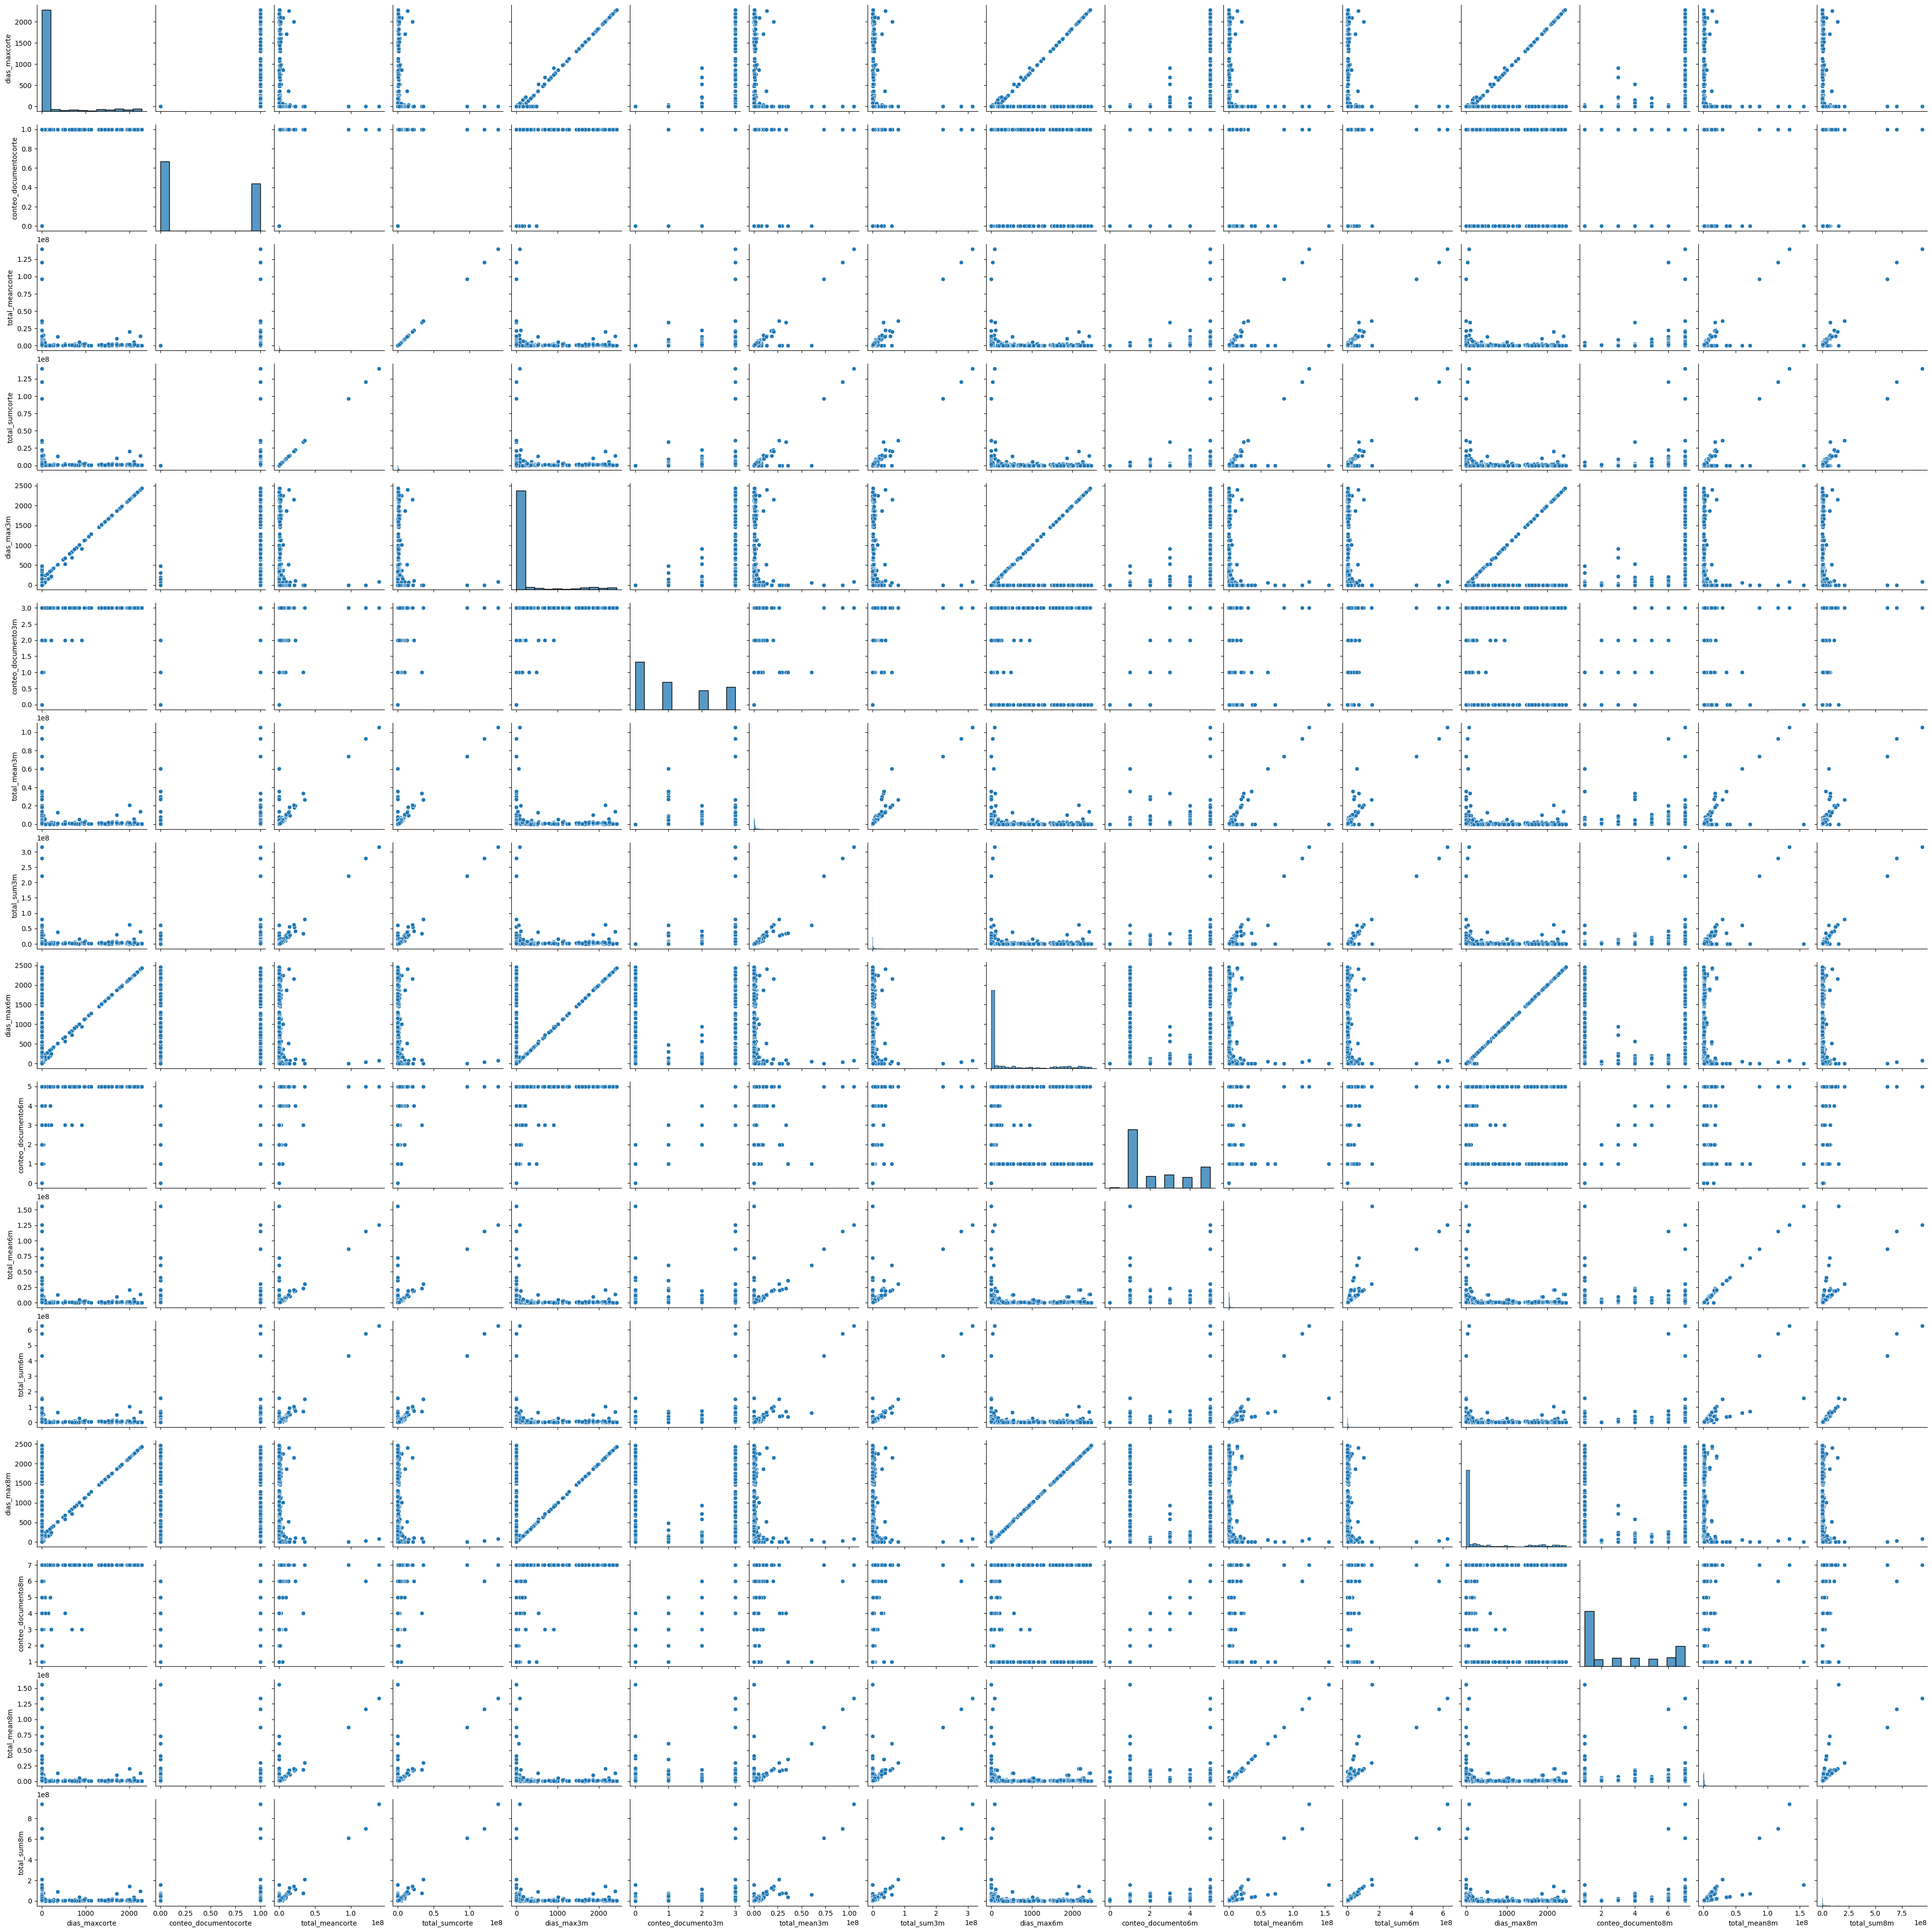

In [24]:
sns.pairplot(numeric_df)

Traer la información para el calculo de clientes vencidos para el mes actual

In [25]:
# Llamando base de interes Y
target = pd.read_excel('C:/Users/Aleja/OneDrive/Escritorio/Cartera/Proyecto - Análisis exploratorio/Proyección de Vencimientos 30062024.xlsx')

Arreglar la base Y, para la correcta gestion del modelo

In [26]:
target['fecha_completa'] = pd.to_datetime('2024-06-30', format='%Y-%m-%d')
target = target.astype({'fec_ela': str, 'fec_vcto' : str})

# Primero, crea un diccionario de los meses en español

meses_esp = {'ENE': '01', 'FEB': '02', 'MAR': '03', 'ABR': '04', 'MAY': '05', 
            'JUN': '06', 'JUL': '07', 'AGO': '08', 'SEP': '09', 'OCT': '10', 
            'NOV': '11', 'DIC': '12'}

# Función para reemplazar el mes en la cadena de fecha
def convertir_fecha(fecha):
    for mes, num in meses_esp.items():
        if mes in fecha.upper():
            fecha = fecha.upper().replace(mes, num)
    return fecha

# Aplicar la función a las columnas de fecha antes de convertirlas a datetime
target['fec_ela'] = target['fec_ela'].apply(convertir_fecha)
target['fec_vcto'] = target['fec_vcto'].apply(convertir_fecha)

# Ahora convierte a datetime usando el formato 'YYYY-MM-DD'
target['fec_ela'] = pd.to_datetime(target['fec_ela'], format='%Y-%m-%d')
target['fec_vcto'] = pd.to_datetime(target['fec_vcto'], format='%Y-%m-%d')

# Crear la variable 'val_fec' comparando 'fec_ela' y 'fec_vcto'
target['val_fec'] = np.where(target['fec_ela'] > target['fec_vcto'], 1, 0)

# Validar fechas
target['val_fec'].value_counts()

# Calcular la diferencia en días entre 'fec_vcto' y 'fec_ela'
dif_days = np.where((target['fec_vcto'] - target['fec_ela']).dt.days>0,(target['fec_vcto'] - target['fec_ela']).dt.days,0)

# Calcular la media de la diferencia en días
df_mean = np.mean(dif_days)

print(df_mean)

# Imputar los valores tipo 1 en 'fec_ela' restando 30 días de 'fec_vcto' donde 'val_fec' es 1
target['fec_ela'] = np.where(target['val_fec'] == 1, target['fec_vcto'] - pd.Timedelta(days=195), target['fec_ela'])

# Crear la variable 'val_fec' comparando 'fec_ela' y 'fec_vcto'
target['val_fec'] = np.where(target['fec_ela'] > target['fec_vcto'], 1, 0)

# Arreglar días de vcto
target['dias_vcto'] = np.where(target['sin_vencer'] == 0, (target['fecha_completa'] - target['fec_ela']).dt.days , 0)

195.92978482446208


In [27]:
target = target.groupby('codigo').agg({'dias_vcto':'max'}).reset_index()
target['target'] = np.where(target['dias_vcto'] > 0,1,0)
print(target.shape)
print(target[target.duplicated(subset='codigo')].shape[0])
target.head()

(329, 3)
0


,codigo,dias_vcto,target
0,247144.0,193.0,1
1,259349.0,0.0,0
2,602319.0,0.0,0
3,1096564.0,268.0,1
4,1835906.0,171.0,1


In [28]:
target.target.value_counts(dropna=False, normalize=True)

target
1    0.534954
0    0.465046
Name: proportion, dtype: float64

In [29]:
df1.iloc[:,1:].corr()

,dias_maxcorte,conteo_documentocorte,total_meancorte,total_sumcorte,dias_max3m,conteo_documento3m,total_mean3m,total_sum3m,dias_max6m,conteo_documento6m,total_mean6m,total_sum6m,dias_max8m,conteo_documento8m,total_mean8m,total_sum8m
dias_maxcorte,1.000000,0.423901,0.014112,0.014112,0.995820,0.559542,0.000202,0.026914,0.654268,0.576826,-0.038393,0.008791,0.654063,0.553400,-0.037922,0.012766
conteo_documentocorte,0.423901,1.000000,0.195972,0.195972,0.441044,0.858983,0.145958,0.169135,0.108866,0.863733,0.012601,0.131502,0.112968,0.814544,0.007931,0.134332
total_meancorte,0.014112,0.195972,1.000000,1.000000,0.018036,0.200418,0.878204,0.974026,-0.029463,0.216539,0.683151,0.968625,-0.029257,0.204217,0.692235,0.973747
total_sumcorte,0.014112,0.195972,1.000000,1.000000,0.018036,0.200418,0.878204,0.974026,-0.029463,0.216539,0.683151,0.968625,-0.029257,0.204217,0.692235,0.973747
dias_max3m,0.995820,0.441044,0.018036,0.018036,1.000000,0.586403,0.003971,0.031218,0.651340,0.603988,-0.037790,0.012124,0.651060,0.580541,-0.037314,0.016524
conteo_documento3m,0.559542,0.858983,0.200418,0.200418,0.586403,1.000000,0.193475,0.213628,0.170505,0.935178,0.034934,0.164367,0.173377,0.900632,0.031731,0.170737
total_mean3m,0.000202,0.145958,0.878204,0.878204,0.003971,0.193475,1.000000,0.943336,-0.059083,0.180265,0.734988,0.897018,-0.058867,0.177578,0.735757,0.894875
total_sum3m,0.026914,0.169135,0.974026,0.974026,0.031218,0.213628,0.943336,1.000000,-0.026009,0.214039,0.723497,0.976654,-0.025874,0.202623,0.731623,0.979941
dias_max6m,0.654268,0.108866,-0.029463,-0.029463,0.651340,0.170505,-0.059083,-0.026009,1.000000,0.227383,-0.058288,-0.030921,0.999584,0.196083,-0.057622,-0.028938
conteo_documento6m,0.576826,0.863733,0.216539,0.216539,0.603988,0.935178,0.180265,0.214039,0.227383,1.000000,0.042515,0.177673,0.230921,0.979243,0.037164,0.183987


Se calculan las variables mas importantes para el modelo

In [30]:
# Calcular la matriz de correlación
df1.iloc[:,1:].corr()

# Identificar las columnas con correlación mayor al 70%
highly_correlated_columns = set() # Crear un conjunto para almacenar columnas a eliminar

# Iterar a través de la matriz de correlación
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > 0.7: # 0.7 es el umbral del 70%
            colname = correlation_matrix.columns[i]
            highly_correlated_columns.add(colname)
print('Numero de columnas en df1: ',df1.shape[1])
print('Numero de columnas a eliminar: ', len(highly_correlated_columns))
print('Numero de columnas resultantes: ',df1.shape[1] - len(highly_correlated_columns))

Numero de columnas en df1:  17
Numero de columnas a eliminar:  12
Numero de columnas resultantes:  5


In [31]:
df1_new = df1.drop(columns=highly_correlated_columns)
df1_new.head()

,codigo,dias_maxcorte,conteo_documentocorte,total_meancorte,dias_max6m
0,00120043775-2,2105.0,1.0,375000.0,2257.0
1,007259,0.0,0.0,0.0,0.0
2,01229757236,0.0,0.0,0.0,130.0
3,04605527,2122.0,1.0,2340000.0,2274.0
4,0766393,0.0,1.0,1032000.0,65.0


Se cruzan las diferentes bases para calcular el modelo

In [32]:
# Merge entre df1 y target

target['codigo'] = target['codigo'].astype(str)
df1_new['codigo'] = df1_new['codigo'].astype(str)

df = pd.merge(target, df1_new, how='left', on='codigo')

df.iloc[:,3:] = df.iloc[:,3:].fillna(0)

print(df.shape)
df.head()

(329, 7)


,codigo,dias_vcto,target,dias_maxcorte,conteo_documentocorte,total_meancorte,dias_max6m
0,247144.0,193.0,1,0.0,0.0,0.0,0.0
1,259349.0,0.0,0,0.0,0.0,0.0,0.0
2,602319.0,0.0,0,0.0,0.0,0.0,0.0
3,1096564.0,268.0,1,0.0,0.0,0.0,0.0
4,1835906.0,171.0,1,0.0,0.0,0.0,171.0


In [33]:
df.isna().sum()

codigo                   0
dias_vcto                0
target                   0
dias_maxcorte            0
conteo_documentocorte    0
total_meancorte          0
dias_max6m               0
dtype: int64

In [34]:
df.columns

Index(['codigo', 'dias_vcto', 'target', 'dias_maxcorte',
       'conteo_documentocorte', 'total_meancorte', 'dias_max6m'],
      dtype='object')

In [35]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [36]:
X = df[['codigo','dias_vcto', 'dias_maxcorte', 'conteo_documentocorte', 'total_meancorte']]
y = df[['target']]

In [37]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y validación (por ejemplo, 70% entrenamiento, 30% validación)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Muestra las formas (tamaños) de los conjuntos resultantes
print("Conjunto de entrenamiento - Características:", X_train.shape)
print("Conjunto de entrenamiento - Variable Objetivo:", y_train.shape)
print("Conjunto de validación - Características:", X_val.shape)
print("Conjunto de validación - Variable Objetivo:", y_val.shape)

Conjunto de entrenamiento - Características: (230, 5)
Conjunto de entrenamiento - Variable Objetivo: (230, 1)
Conjunto de validación - Características: (99, 5)
Conjunto de validación - Variable Objetivo: (99, 1)


Index(['dias_vcto'], dtype='object')


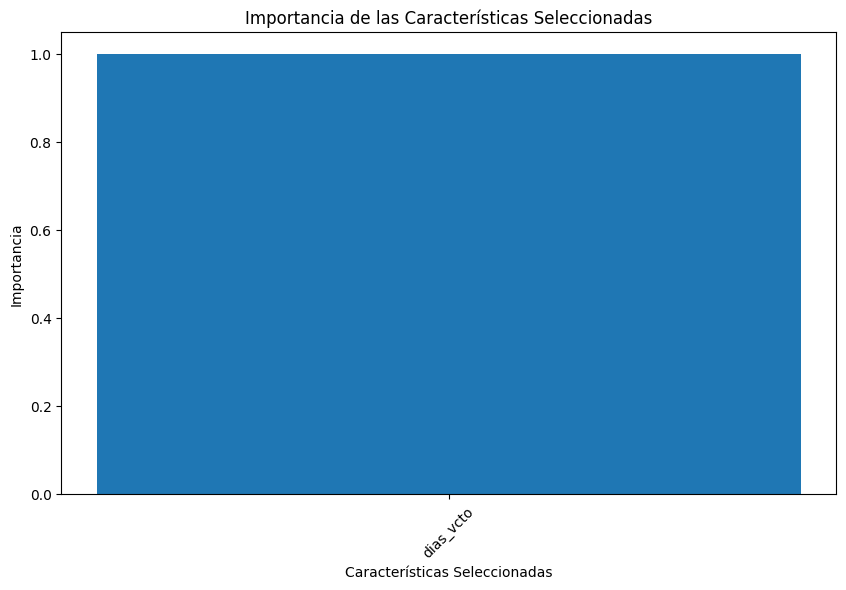

In [38]:
# Mejores variables
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
# Crear un selector de características basado en la importancia del modelo
sfm = SelectFromModel(clf, threshold='mean')  # Puedes ajustar el umbral según tus necesidades
# Obtener las características seleccionadas
selected_features = np.array(X.columns)[sfm.get_support()]
# Obtener la importancia de las características seleccionadas
feature_importance = clf.feature_importances_[sfm.get_support()]
print(X.columns[sfm.get_support(indices=True)])
# Crear un gráfico de barras para mostrar la importancia de las características seleccionadas
plt.figure(figsize=(10, 6))
plt.bar(selected_features, feature_importance)
plt.xlabel('Características Seleccionadas')
plt.ylabel('Importancia')
plt.title('Importancia de las Características Seleccionadas')
plt.xticks(rotation=45)
plt.show()

In [39]:
# Mejores hiperparametros
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
                'splitter': ['best', 'random'],
                'max_depth': [2, 3, 4, 5, 6, 7, 8],
                'min_samples_split': [2, 3, 4, 5, 6, 7, 8]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid)
grid_search.fit(X_train[['codigo','dias_vcto', 'dias_maxcorte', 'conteo_documentocorte', 'total_meancorte']], y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

C:\Users\Aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [40]:
print(best_params)
print(best_estimator)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 4, 'splitter': 'random'}
DecisionTreeClassifier(max_depth=7, min_samples_split=4, splitter='random')


In [41]:
# Entrenando modelo 
model = best_estimator
model = model.fit(X_train[['codigo','dias_vcto', 'dias_maxcorte', 'conteo_documentocorte', 'total_meancorte']], y_train)
#y_pred = model.predict(X_train[['mora_max_corte', 'valor_facturas_corte', 'prom_facturas_corte','porcentaje_uso_cupo_corte', 'mora_max_12m']])
y_prob = model.predict_proba(X_train[['codigo','dias_vcto', 'dias_maxcorte', 'conteo_documentocorte', 'total_meancorte']])[:, 1]
y_pred = (y_prob > 0.35).astype(int)
# Imprimir el informe de clasificación
classification_rep = classification_report(y_train, y_pred)
print("Informe de Clasificación:\n", classification_rep)

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       102
           1       1.00      0.99      1.00       128

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230



<Axes: >

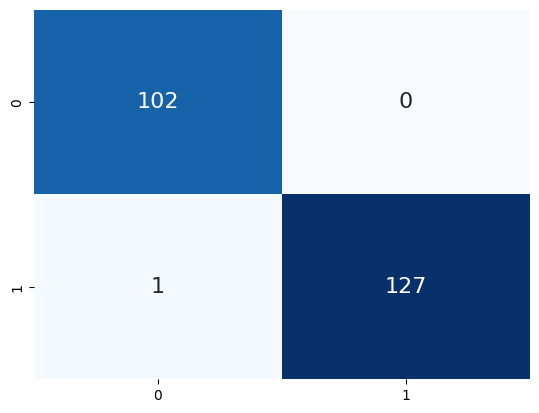

In [42]:
# Crear el mapa de calor
sns.heatmap(metrics.confusion_matrix(y_train, y_pred), annot=True, annot_kws={"size": 16}, fmt='d', cmap='Blues',cbar=False)

Cpnclusiones: Se abordó el problema desde distintas miradas, se logró visualizar en los diferentes análisis, univariado y multivariado que las variables no presentaban una relación importante, por lo tanto, se abordó la preparación de datos cómo base en la creación de variables sinteticas para lograr obtener relaciones más fuertes y así lograr predecir los clientes próximos a vencer.

Por su parte, el modelo presenta multicolinealidad, esto se debe a que la variable de interes fue calculada en base a variables dependientes, se debe buscar la forma de gestionar e incluir variables externas que posean una relación fuerte que explique la variable de interes, se logró imputar variables y tener relaciones más fuertes, aún así, obtuvimos un problema de sobre explicación del modelo.